In [1]:
import os, shutil
import random
import gc  
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 
import keras
from keras.applications import InceptionResNetV2
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
# import scikit-image
from keras.models import load_model

Using TensorFlow backend.


In [2]:
from skimage.transform import resize

In [2]:
nrows = 512
ncolumns = 512
channels = 3  

In [5]:
def img_pred(file):
    
    img = mpimg.imread(file)
#     img = cv2.resize(img, (nrows,ncolumns), interpolation=cv2.INTER_CUBIC)
    img = resize(img,(nrows,ncolumns),mode = 'constant')
    print(img)
    print('///////////////////////////////////////')
    img = keras.applications.inception_resnet_v2.preprocess_input(img)
    print(img)
    return img

In [6]:
gc.collect()
batch_size = 8  

In [12]:
conv_base = InceptionResNetV2( include_top=False, input_shape=(512,512,3))
conv_base.summary()














__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 255, 255, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 255, 255, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 255, 255, 32) 0           batch_normalization_1[0][0]      
________________________________________________________________________________________________

conv2d_95 (Conv2D)              (None, 30, 30, 160)  143360      activation_94[0][0]              
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 30, 30, 160)  480         conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 30, 30, 160)  0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_93 (Conv2D)              (None, 30, 30, 192)  208896      block17_4_ac[0][0]               
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 30, 30, 192)  215040      activation_95[0][0]              
__________________________________________________________________________________________________
batch_norm

__________________________________________________________________________________________________
block8_2_ac (Activation)        (None, 14, 14, 2080) 0           block8_2[0][0]                   
__________________________________________________________________________________________________
conv2d_173 (Conv2D)             (None, 14, 14, 192)  399360      block8_2_ac[0][0]                
__________________________________________________________________________________________________
batch_normalization_173 (BatchN (None, 14, 14, 192)  576         conv2d_173[0][0]                 
__________________________________________________________________________________________________
activation_173 (Activation)     (None, 14, 14, 192)  0           batch_normalization_173[0][0]    
__________________________________________________________________________________________________
conv2d_174 (Conv2D)             (None, 14, 14, 224)  129024      activation_173[0][0]             
__________

In [13]:
model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten()) 
model.add(layers.Dense(100, activation='relu')) 
model.add(layers.Dropout(0.25)) 
model.add(layers.Dense(50,activation='relu')) 
model.add(layers.Dropout(0.25)) 
model.add(layers.Dense(3, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
#Lets see our model
# model.summary()

In [14]:
for layer in conv_base.layers:
    layer.trainable = True

for layer in conv_base.layers[:-50]:
    layer.trainable = False


In [15]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
model = load_model('model_wieghtsWeedCropSoil11.h5')














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# test_imgs = []
# crop_img = ['C:/Users/Dilip/Desktop/precessData/test/crop2.jpg']
def read_and_process_image(list_of_images):
    """
    Returns two arrays:
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
   
    for image in list_of_images:
        try :
            img = mpimg.imread(image)
            X.append(cv2.resize(img, (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  
            
            if 'crop' in image:
                y.append(1)
            elif 'weed' in image:
                y.append(0)
            elif 'soil' in image:
                y.append(2)
        except Exception as e:
            print(str(e))
   
    return X, y

In [121]:
# X_test = read_and_process_image(crop_img) 
# x = np.array(X_test)
# test_datagen = ImageDataGenerator(rescale=1./255)
test_imgs = ['C:/Users/Dilip/Desktop/precessData/resizeImg/{}'.format(i) for i in os.listdir('C:/Users/Dilip/Desktop/precessData/resizeImg')] #get test images
print(test_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X = np.array(X_test)
print(len(X))
print(X.shape)
X2 = X
print(len(X2),len(X))
X=np.array([[]])
# X=np.array([X2[0]])
# print(len(X))
# print(X2.shape)
# print(X.shape)

['C:/Users/Dilip/Desktop/precessData/resizeImg/crop0.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop1.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop10.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop100.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop101.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop102.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop103.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop104.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop105.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop106.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop11.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop110.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop111.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop112.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop113.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg/crop114.jpg', 'C:/Users/Dilip/Desktop/precessData/resizeImg

300
(300, 512, 512, 3)
300 300


In [99]:
for X3 in range(len(X2)):
    X=np.array([X2[X3]])
    print(X.shape)

(1, 512, 512, 3)
(1, 512, 512, 3)


In [124]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
count =0
count1 = 0
cc_crop=0
wc_crop=0
cc_weed = 0
wc_weed = 0
cc_soil = 0
wc_soil = 0
test_datagen = ImageDataGenerator(rescale=1./255)

# img = mpimg.imread('C:/Users/Dilip/Desktop/precessData/resizeImg/'+os.listdir('C:/Users/Dilip/Desktop/precessData/resizeImg')[0])
# fig, ax = plt.subplots()
# plt.imshow(img) 
# ax.set_title('Original image')
# plt.show() 
# # img = mpimg.imread('C:/Users/Dilip/Desktop/precessData/resizeImg/'+os.listdir('C:/Users/Dilip/Desktop/precessData/resizeImg')[0])
# fig, ax = plt.subplots()
# plt.imshow(X_test[0]) 
# ax.set_title('processed image')
# plt.show()
print(len(X2))
for i in test_imgs:
    print(i)
    X=np.array([X2[count1]])
    count1+=1
    print(X.shape)
    count =0
    for batch in test_datagen.flow(X, batch_size=1):
        if count == len(X):
            break
        count+=1
        pred = model.predict(batch)
    #     print('prediction is =>')
    #     print(pred,pred.max()) 
        if pred.max() == pred[0][0]: 
    #         print(pred.max()*100)
            print(' prediction  => This is a weed   '.format(int(pred.max())*100)) 
            if 'weed' in i:
                cc_weed +=1
                print("cc_weed: ",cc_weed)
            else:
                wc_weed +=1
                print("wc_weed: ",wc_weed)
        if pred.max() == pred[0][1]: 
    #         print(pred.max()*100)
            print('prediction  => This is a crop   '.format(int(pred.max())*100)) 
            if 'crop' in i:
                cc_crop +=1
                print("cc_crop: ",cc_crop)
            else:
                wc_crop +=1
                print("wc_crop: ", wc_crop)
        if pred.max() == pred[0][2]:
    #         print(pred.max()*100)
            print('prediction  => This is a soil   '.format(int(pred.max())*100))
            if 'soil' in i:
                cc_soil +=1
                print("cc_soil: ",cc_soil)
            else:
                wc_soil +=1
                print("wc_soil: ",wc_soil)

    
#     print(len(batch))
# p = range(len([1,2,3]))
# print(p)
# print(pred)
# for i in p:
#     print('jay')
# print(pred,pred.max()) 
# if pred.max() == pred[0][0]: 
#     print('weed') 
# if pred.max() == pred[0][1]: 
#     print('crop') 
# if pred.max() == pred[0][2]:
#     print('soil')

300
C:/Users/Dilip/Desktop/precessData/resizeImg/crop0.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  1
C:/Users/Dilip/Desktop/precessData/resizeImg/crop1.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  2
C:/Users/Dilip/Desktop/precessData/resizeImg/crop10.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  3
C:/Users/Dilip/Desktop/precessData/resizeImg/crop100.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  4
C:/Users/Dilip/Desktop/precessData/resizeImg/crop101.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  5
C:/Users/Dilip/Desktop/precessData/resizeImg/crop102.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  6
C:/Users/Dilip/Desktop/precessData/resizeImg/crop103.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  7
C:/Users/Dilip/Desktop/precessData/resizeImg/crop104.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  8
C:/Users/Dilip/Desktop/precessData/resizeImg/crop

prediction  => This is a crop   
cc_crop:  69
C:/Users/Dilip/Desktop/precessData/resizeImg/crop56.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  70
C:/Users/Dilip/Desktop/precessData/resizeImg/crop6.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  71
C:/Users/Dilip/Desktop/precessData/resizeImg/crop60.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  72
C:/Users/Dilip/Desktop/precessData/resizeImg/crop61.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  73
C:/Users/Dilip/Desktop/precessData/resizeImg/crop62.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  74
C:/Users/Dilip/Desktop/precessData/resizeImg/crop63.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  75
C:/Users/Dilip/Desktop/precessData/resizeImg/crop64.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  76
C:/Users/Dilip/Desktop/precessData/resizeImg/crop65.jpg
(1, 512, 512, 3)
prediction  => This is a crop   
cc_crop:  77
C:/

prediction  => This is a soil   
cc_soil:  38
C:/Users/Dilip/Desktop/precessData/resizeImg/soil(314).jpg
(1, 512, 512, 3)
prediction  => This is a soil   
cc_soil:  39
C:/Users/Dilip/Desktop/precessData/resizeImg/soil(315).jpg
(1, 512, 512, 3)
prediction  => This is a soil   
cc_soil:  40
C:/Users/Dilip/Desktop/precessData/resizeImg/soil(316).jpg
(1, 512, 512, 3)
prediction  => This is a soil   
cc_soil:  41
C:/Users/Dilip/Desktop/precessData/resizeImg/soil(317).jpg
(1, 512, 512, 3)
prediction  => This is a soil   
cc_soil:  42
C:/Users/Dilip/Desktop/precessData/resizeImg/soil(318).jpg
(1, 512, 512, 3)
prediction  => This is a soil   
cc_soil:  43
C:/Users/Dilip/Desktop/precessData/resizeImg/soil(319).jpg
(1, 512, 512, 3)
prediction  => This is a soil   
cc_soil:  44
C:/Users/Dilip/Desktop/precessData/resizeImg/soil(320).jpg
(1, 512, 512, 3)
prediction  => This is a soil   
cc_soil:  45
C:/Users/Dilip/Desktop/precessData/resizeImg/soil(321).jpg
(1, 512, 512, 3)
prediction  => This is a

 prediction  => This is a weed   
cc_weed:  6
C:/Users/Dilip/Desktop/precessData/resizeImg/weed106.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  7
C:/Users/Dilip/Desktop/precessData/resizeImg/weed107.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  8
C:/Users/Dilip/Desktop/precessData/resizeImg/weed108.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  9
C:/Users/Dilip/Desktop/precessData/resizeImg/weed109.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  10
C:/Users/Dilip/Desktop/precessData/resizeImg/weed110.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  11
C:/Users/Dilip/Desktop/precessData/resizeImg/weed111.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  12
C:/Users/Dilip/Desktop/precessData/resizeImg/weed112.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  13
C:/Users/Dilip/Desktop/precessData/resizeImg/weed113.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc

 prediction  => This is a weed   
cc_weed:  73
C:/Users/Dilip/Desktop/precessData/resizeImg/weed75.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  74
C:/Users/Dilip/Desktop/precessData/resizeImg/weed76.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  75
C:/Users/Dilip/Desktop/precessData/resizeImg/weed77.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  76
C:/Users/Dilip/Desktop/precessData/resizeImg/weed78.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  77
C:/Users/Dilip/Desktop/precessData/resizeImg/weed79.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  78
C:/Users/Dilip/Desktop/precessData/resizeImg/weed80.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  79
C:/Users/Dilip/Desktop/precessData/resizeImg/weed81.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_weed:  80
C:/Users/Dilip/Desktop/precessData/resizeImg/weed82.jpg
(1, 512, 512, 3)
 prediction  => This is a weed   
cc_wee

In [125]:
print("cc_crop: {} wc_crop: {} cc_weed: {} wc_weed: {} cc_soil: {} wc_soil: {}".format(cc_crop,wc_crop,cc_weed,wc_weed,cc_soil,wc_soil))

cc_crop: 99 wc_crop: 1 cc_weed: 98 wc_weed: 1 cc_soil: 100 wc_soil: 1


In [10]:
# i = 0
# columns = 1
# text_labels = []
# for batch in test_datagen.flow(x, batch_size=1):
#     pred = model.predict(batch)
    
# print(pred)
# #     if pred > 0.5:
# #         print('crop')
# #         break
# #     else:
# #         print('weed')
# #         break
import time

In [17]:
# len(os.listdir('C:/Users/Dilip/Desktop/precessData/train'))
# cc_crop=0
# wc_crop=0
# cc_weed = 0
# wc_weed = 0
# cc_soil = 0
# wc_soil = 0
# start = 0
# stop = 0
# duration = 0
# for i in os.listdir('C:/Users/Dilip/Desktop/precessData/train'):
#     start = time.time()
#     img = img_pred("C:/Users/Dilip/Desktop/precessData/train/{}".format(i)) 
#     img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]]) 
#     prediction = model.predict(img)
#     stop = time.time()
#     duration = stop-start
#     print(i,duration)
#     if prediction.max() == prediction[0][0]: 
#         if 'crop' in i:
#             cc_crop +=1
#             print("cc_crop: ",cc_crop)
#         else:
#             wc_crop +=1
#             print("wc_crop: ",wc_crop)
#     if prediction.max() == prediction[0][1]: 
#         if 'weed' in i:
#             cc_weed +=1
#             print("cc_weed: ",cc_weed)
#         else:
#             wc_weed +=1
#             print("wc_weed: ", wc_weed)
#     if prediction.max() == prediction[0][2]:
#         if 'soil' in i:
#             cc_soil +=1
#             print("cc_soil: ",cc_soil)
#         else:
#             wc_soil +=1
#             print("wc_soil: ",wc_soil)

crop0.jpg 0.9520714282989502
wc_soil:  1
crop1.jpg 0.9291436672210693
wc_soil:  2
crop10.jpg 0.9907135963439941
wc_soil:  3
crop100.jpg 0.9721488952636719
wc_soil:  4
crop101.jpg 1.001356601715088
wc_soil:  5
crop102.jpg 0.9713780879974365
wc_soil:  6
crop103.jpg 0.9994606971740723
wc_soil:  7
crop104.jpg 0.9951119422912598
wc_soil:  8
crop105.jpg 0.9938242435455322
wc_soil:  9
crop106.jpg 0.9909131526947021
wc_soil:  10
crop107.jpg 0.9540009498596191
wc_soil:  11
crop108.jpg 1.033555269241333
wc_soil:  12
crop109.jpg 0.9890685081481934
wc_soil:  13
crop11.jpg 0.9937193393707275
wc_soil:  14
crop110.jpg 1.1506538391113281
wc_soil:  15
crop111.jpg 0.9887049198150635
wc_soil:  16
crop112.jpg 0.9634253978729248
wc_soil:  17
crop113.jpg 0.9833109378814697
wc_soil:  18
crop114.jpg 0.976210355758667
wc_soil:  19
crop115.jpg 0.9883787631988525
wc_soil:  20
crop116.jpg 0.9817345142364502
wc_soil:  21


KeyboardInterrupt: 

In [13]:
print("cc_crop: {} wc_crop: {} cc_weed: {} wc_weed: {} cc_soil: {} wc_soil: {}".format(cc_crop,wc_crop,cc_weed,wc_weed,cc_soil,wc_soil))

cc_crop: 4 wc_crop: 117 cc_weed: 29 wc_weed: 8 cc_soil: 468 wc_soil: 874


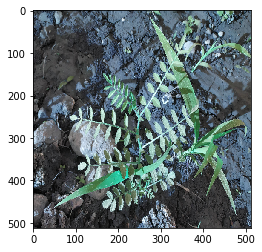

[[0. 0. 1.]] 1.0
soil


In [20]:
img = img_pred("C:/Users/Dilip/Desktop/precessData/train/crop57.jpg") 
plt.imshow(img) 
plt.show() 
img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]]) 
prediction = model.predict(img)

print(prediction,prediction.max()) 
if prediction.max() == prediction[0][0]: 
    print('crop') 
if prediction.max() == prediction[0][1]: 
    print('weed') 
if prediction.max() == prediction[0][2]:
    print('soil')

In [14]:
import Image

ModuleNotFoundError: No module named 'Image'